In [ ]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Semantic Router Agent

<table align="left">
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/agent-design-patterns/semantic-router.ipynb">
      <img width="32px" src="https://www.gstatic.com/pantheon/images/bigquery/welcome_page/colab-logo.svg" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fgenerative-ai%2Fmain%2Fgemini%2Fsample-apps%2Fgenai-experience-concierge%2Fagent-design-patterns%2Fsemantic-router.ipynb">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/workbench/deploy-notebook?download_url=https://raw.githubusercontent.com/GoogleCloudPlatform/generative-ai/main/gemini/sample-apps/genai-experience-concierge/agent-design-patterns/semantic-router.ipynb">
      <img src="https://www.gstatic.com/images/branding/gcpiconscolors/vertexai/v1/32px.svg" alt="Vertex AI logo"><br> Open in Vertex AI Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/agent-design-patterns/semantic-router.ipynb">
      <img width="32px" src="https://www.svgrepo.com/download/217753/github.svg" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>

<div style="clear: both;"></div>

<b>Share to:</b>

<a href="https://www.linkedin.com/sharing/share-offsite/?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/agent-design-patterns/semantic-router.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/8/81/LinkedIn_icon.svg" alt="LinkedIn logo">
</a>

<a href="https://bsky.app/intent/compose?text=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/agent-design-patterns/semantic-router.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/7/7a/Bluesky_Logo.svg" alt="Bluesky logo">
</a>

<a href="https://twitter.com/intent/tweet?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/agent-design-patterns/semantic-router.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/5a/X_icon_2.svg" alt="X logo">
</a>

<a href="https://reddit.com/submit?url=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/agent-design-patterns/semantic-router.ipynb" target="_blank">
  <img width="20px" src="https://redditinc.com/hubfs/Reddit%20Inc/Brand/Reddit_Logo.png" alt="Reddit logo">
</a>

<a href="https://www.facebook.com/sharer/sharer.php?u=https%3A//github.com/GoogleCloudPlatform/generative-ai/blob/main/gemini/sample-apps/genai-experience-concierge/agent-design-patterns/semantic-router.ipynb" target="_blank">
  <img width="20px" src="https://upload.wikimedia.org/wikipedia/commons/5/51/Facebook_f_logo_%282019%29.svg" alt="Facebook logo">
</a>

| | | |
|-|-|-|
|Author(s) | [Ahmad Khan](https://github.com/Akhan221) | [Pablo Gaeta](https://github.com/pablofgaeta) |

## Overview

### Introduction

The semantic router pattern is an approach to dynamically pick one expert agent from a collection of candidates that is best fit to address the current user input.

This demo uses an LLM-based intent detection classifier to route each user query to either a "Retail Search" or "Customer Support" expert assistant. The experts are mocked as simple Gemini calls with a system prompt for this demo, but represent an arbitrary actor that can share session history with all other sub-agents. For example, the customer support agent might be implemented with [Contact Center as a Service](https://cloud.google.com/solutions/contact-center-ai-platform) while the retail search assistant is built with Gemini and deployed on Cloud Run.

The semantic router layer can provide a useful facade to enable a single interface for multiple different agent backends.

### Key Components

The key components of this Semantic Router Agent include:

* **Language Model:** Gemini is used for intent detection and conversational response generation.
* **State Management:** LangGraph manages the conversation flow and maintains the session state, including conversation history and sub-agent routing.
* **Router Node:** This node is responsible for classifying user queries. It uses a Gemini model to analyze the input and determine whether it relates to retail search, customer service, or falls outside the agent's capabilities.

### Workflow

The workflow of the Semantic Router Agent can be summarized as follows:

1.  The user provides an input query.
2.  The **Router Node** classifies the query using a Gemini model, determining the appropriate sub-agent.
3.  The query is routed to either the **Retail Search Node** or the **Customer Service Node**, depending on the classification. If the query is unsupported, it's routed to the **Post-Process Node** and a fallback message is provided.
4.  The selected sub-agent (or the Post-Process Node for unsupported queries) generates a response.
5.  The **Post-Process Node** updates the conversation history with the user input and the agent's response.
6.  The agent is ready for the next user input, continuing the loop.

## Get Started

### Install dependencies

In [1]:
%pip install -q langgraph langgraph-checkpoint google-genai

### Restart runtime

To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel.

The restart might take a minute or longer. After it's restarted, continue to the next step.

In [ ]:
# import IPython

# app = IPython.Application.instance()
# app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

### Authenticate your notebook environment (Colab only)

If you're running this notebook on Google Colab, run the cell below to authenticate your environment.

In [ ]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

## Notebook parameters

In [2]:
# Use the environment variable if the user doesn't provide Project ID.
import os

PROJECT_ID = "[your-project-id]"  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

REGION = "us-central1"  # @param {type:"string"}
CHAT_MODEL_NAME = "gemini-1.5-pro-002"  # @param {type:"string"}
ROUTER_MODEL_NAME = "gemini-1.5-flash-002"  # @param {type:"string"}
MAX_TURN_HISTORY = 3  # @param {type:"integer"}

## Define the Semantic Router Agent

### Import dependencies

In [3]:
from collections.abc import AsyncIterator
import datetime
import enum
import logging
from typing import Literal, TypedDict
import uuid

from IPython import display as ipd
from google import genai  # type: ignore[import-untyped]
from google.genai import types as genai_types  # type: ignore[import-untyped]
from langchain_core.runnables import config as lc_config
from langgraph import graph
from langgraph import types as lg_types
from langgraph.checkpoint import memory as memory_checkpoint
from langgraph.config import get_stream_writer
import pydantic

logger = logging.getLogger(__name__)

### Define schemas

Defines all of the schemas, constants, and types required for building the agent.

In [4]:
# Agent config settings


class AgentConfig(pydantic.BaseModel):
    """Configuration settings for the agent, including project, region, and model details."""

    project: str
    """The Google Cloud project ID."""
    region: str
    """The Google Cloud region where the agent is deployed."""
    chat_model_name: str
    """The name of the Gemini chat model to use for generating responses."""
    router_model_name: str
    """The name of the Gemini model to use for routing user queries."""
    max_router_turn_history: int
    """The maximum number of turns to include in the router's context window."""


# Node names and literal types

ROUTER_NODE_NAME = "ROUTER"
"""The name of the router node in the LangGraph."""
ROUTER_NODE_TARGET_LITERAL = Literal["ROUTER"]
"""Literal type for the router node target."""

RETAIL_NODE_NAME = "RETAIL"
"""The name of the retail node in the LangGraph."""
RETAIL_NODE_TARGET_LITERAL = Literal["RETAIL"]
"""Literal type for the retail node target."""

CUSTOMER_SERVICE_NODE_NAME = "CUSTOMER_SERVICE"
"""The name of the customer service node in the LangGraph."""
CUSTOMER_SERVICE_NODE_TARGET_LITERAL = Literal["CUSTOMER_SERVICE"]
"""Literal type for the customer service node target."""

POST_PROCESS_NODE_NAME = "POST_PROCESS"
"""The name of the post-processing node in the LangGraph."""
POST_PROCESS_NODE_TARGET_LITERAL = Literal["POST_PROCESS"]
"""Literal type for the post-processing node target."""

END_NODE_TARGET_LITERAL = Literal["__end__"]
"""Literal type for the end node target."""

# Router classification


class RouterTarget(enum.Enum):
    """Enumeration representing the possible targets for routing user queries."""

    customer_service = "Customer Support Assistant"
    """Target for customer service related queries."""
    retail_search = "Conversational Retail Search Assistant"
    """Target for retail search related queries."""
    unsupported = "Unsupported"
    """Target for unsupported queries."""


class RouterClassification(pydantic.BaseModel):
    """Structured classification output for routing user queries."""

    reason: str = pydantic.Field(
        description="Reason for classifying the latest user query."
    )
    """Explanation of why the query was classified to a specific target."""
    target: RouterTarget
    """The target node to route the query to."""

    model_config = pydantic.ConfigDict(
        json_schema_extra={"propertyOrdering": ["reason", "target"]}
    )
    """Configuration to specify the ordering of properties in the JSON schema."""


# LangGraph models


class Turn(TypedDict, total=False):
    """
    Represents a single turn in a conversation.

    Attributes:
        id: Unique identifier for the turn.
        created_at: Timestamp of when the turn was created.
        user_input: The user's input in this turn.
        response: The agent's response in this turn, if any.
        router_classification: The router classification for this turn, if any.
        messages: A list of Gemini content messages associated with this turn.
    """

    id: uuid.UUID
    """Unique identifier for the turn."""

    created_at: datetime.datetime
    """Timestamp of when the turn was created."""

    user_input: str
    """The user's input for this turn."""

    response: str
    """The agent's response for this turn, if any."""

    router_classification: RouterClassification | None
    """The router classification for this turn, if any."""

    messages: list[genai_types.Content]
    """List of Gemini Content objects representing the conversation messages in this turn."""


class GraphSession(TypedDict, total=False):
    """
    Represents the complete state of a conversation session.

    Attributes:
        id: Unique identifier for the session.
        created_at: Timestamp of when the session was created.
        current_turn: The current turn in the session, if any.
        turns: A list of all turns in the session.
    """

    id: uuid.UUID
    """Unique identifier for the session."""

    created_at: datetime.datetime
    """Timestamp of when the session was created."""

    current_turn: Turn | None
    """The current conversation turn."""

    turns: list[Turn]
    """List of all conversation turns in the session."""

### Nodes

#### Router Node

Classifies the current user input in context of the conversation and routes to the appropriate sub-agent. In case no sub-agent supports the user query, will respond with a fallback message.

In [5]:
UNSUPPORTED_FALLBACK_MESSAGE = "I'm sorry, I am unable to process your request as it is outside of my current capabilities. Please try asking me about our retail business or customer support."

ROUTER_SYSTEM_PROMPT = f"""
You are an expert in classifying user queries for an agentic workflow for Cymbal, a retail company.
First reason through how you will classify the query given the conversation history.
Then, classify user queries to be sent to one of several AI assistants that can help the user.

Classify every inputted query as: "{RouterTarget.customer_service.value}", "{RouterTarget.retail_search.value}", "{RouterTarget.unsupported.value}".

Class target descriptions:
- "{RouterTarget.retail_search.value}": Any pleasantries/general conversation or discussion of Cymbal retail products/stores/inventory, including live data.
- "{RouterTarget.customer_service.value}": Queries related to customer service such as item returns, policies, complaints, FAQs, escalations, etc.
- "{RouterTarget.unsupported.value}": Any query that is off topic or out of scope for one of the other agents.

<examples>
input: Is the Meinl Byzance Jazz Ride 18" available?
output: {RouterTarget.retail_search.value}

input: Recommend a good pair of running shoes.
output: {RouterTarget.retail_search.value}

input: How do i initiate a return?
output: {RouterTarget.customer_service.value}

input: you suck, why do you refuse to be useful!
output: {RouterTarget.customer_service.value}

input: How far is the earth from the sun?
output: {RouterTarget.unsupported.value}

input: What's the weather like today?
output: {RouterTarget.unsupported.value}
</examples>
""".strip()


async def ainvoke_router(
    state: GraphSession,
    config: lc_config.RunnableConfig,
) -> lg_types.Command[
    Literal[
        RETAIL_NODE_TARGET_LITERAL,
        CUSTOMER_SERVICE_NODE_TARGET_LITERAL,
        POST_PROCESS_NODE_TARGET_LITERAL,
    ]
]:
    """
    Asynchronously invokes the router node to classify user input and determine the next action.

    This function takes the current conversation state and configuration, interacts with the
    Gemini model to classify the user's input based on predefined categories, and
    determines which sub-agent should handle the request.

    Args:
        state: The current state of the conversation session, including user input and history.
        config: The LangChain RunnableConfig containing agent-specific configurations.

    Returns:
        A Command object that specifies the next node to transition to (retail, customer service, or post-processing)
        and the updated conversation state. This state includes the router classification.
    """

    agent_config = AgentConfig.model_validate(
        config["configurable"].get("agent_config", {})
    )

    stream_writer = get_stream_writer()

    current_turn = state.get("current_turn")
    assert current_turn is not None, "current turn must be set"

    user_input = current_turn.get("user_input")
    assert user_input is not None, "user input must be set"

    # Initialize generate model
    client = genai.Client(
        vertexai=True,
        project=agent_config.project,
        location=agent_config.region,
    )

    # Add new user input to history
    turns = state.get("turns", [])[: agent_config.max_router_turn_history]
    history = [content for turn in turns for content in turn.get("messages", [])]
    user_content = genai_types.Content(
        role="user",
        parts=[genai_types.Part.from_text(text=user_input)],
    )
    contents = history + [user_content]

    # generate streaming response
    response = await client.aio.models.generate_content(
        model=agent_config.router_model_name,
        contents=contents,
        config=genai_types.GenerateContentConfig(
            candidate_count=1,
            temperature=0.2,
            seed=0,
            system_instruction=ROUTER_SYSTEM_PROMPT,
            response_mime_type="application/json",
            response_schema=RouterClassification,
        ),
    )

    router_classification = RouterClassification.model_validate_json(response.text)

    stream_writer(
        {
            "router_classification": {
                "target": router_classification.target.value,
                "reason": router_classification.reason,
            }
        }
    )

    current_turn["router_classification"] = router_classification

    next_node = None
    match router_classification.target:
        case RouterTarget.retail_search:
            next_node = RETAIL_NODE_NAME
        case RouterTarget.customer_service:
            next_node = CUSTOMER_SERVICE_NODE_NAME
        case RouterTarget.unsupported:
            next_node = POST_PROCESS_NODE_NAME
            current_turn["response"] = UNSUPPORTED_FALLBACK_MESSAGE
            stream_writer({"text": current_turn["response"]})
        case _:  # never
            raise RuntimeError(
                f"Unhandled router classification target: {router_classification.target}"
            )

    return lg_types.Command(
        update=GraphSession(current_turn=current_turn),
        goto=next_node,
    )

### Customer Service Node

A mock sub-agent that will make up responses acting as the Cymbal Retail customer service agent.

In [6]:
CUSTOMER_SERVICE_SYSTEM_PROMPT = "Answer customer service questions about the Cymbal retail company. Cymbal offers both online retail and physical stores. Feel free to make up information about this fictional company, this is just for the purposes of a demo."


async def ainvoke_customer_service(
    state: GraphSession,
    config: lc_config.RunnableConfig,
) -> lg_types.Command[POST_PROCESS_NODE_TARGET_LITERAL]:
    """
    Asynchronously invokes the customer service chat node to generate a response using a Gemini model.

    This function takes the current conversation state and configuration, interacts with the
    Gemini model to generate a customer service-oriented response based on the user's input
    and conversation history, and streams the response back to the user.

    Args:
        state: The current state of the conversation session, including user input and history.
        config: The LangChain RunnableConfig containing agent-specific configurations.

    Returns:
        A Command object that specifies the next node to transition to (post-processing) and the
        updated conversation state. This state includes the model's customer service response and
        the updated conversation history.
    """

    agent_config = AgentConfig.model_validate(
        config["configurable"].get("agent_config", {})
    )

    stream_writer = get_stream_writer()

    current_turn = state.get("current_turn")
    assert current_turn is not None, "current turn must be set"

    user_input = current_turn.get("user_input")
    assert user_input is not None, "user input must be set"

    # Initialize generate model
    client = genai.Client(
        vertexai=True,
        project=agent_config.project,
        location=agent_config.region,
    )

    # Add new user input to history
    turns = state.get("turns", [])
    history = [content for turn in turns for content in turn.get("messages", [])]
    user_content = genai_types.Content(
        role="user",
        parts=[genai_types.Part.from_text(text=user_input)],
    )
    contents = history + [user_content]

    try:
        # generate streaming response
        response: AsyncIterator[genai_types.GenerateContentResponse] = (
            await client.aio.models.generate_content_stream(
                model=agent_config.chat_model_name,
                contents=contents,
                config=genai_types.GenerateContentConfig(
                    candidate_count=1,
                    temperature=0.2,
                    seed=0,
                    system_instruction=CUSTOMER_SERVICE_SYSTEM_PROMPT,
                ),
            )
        )

        # stream response text to custom stream writer
        response_text = ""
        async for chunk in response:
            response_text += chunk.text
            stream_writer({"text": chunk.text})

        response_content = genai_types.Content(
            role="model",
            parts=[genai_types.Part.from_text(text=response_text)],
        )

    except Exception as e:
        logger.exception(e)
        # unexpected error, display it
        response_text = f"An unexpected error occured during generation, please try again.\n\nError = {str(e)}"
        stream_writer({"error": response_text})
        response_content = genai_types.Content(
            role="model",
            parts=[genai_types.Part.from_text(text=response_text)],
        )

    current_turn["response"] = response_text.strip()
    current_turn["messages"] = [user_content, response_content]

    return lg_types.Command(
        update=GraphSession(current_turn=current_turn),
        goto=POST_PROCESS_NODE_NAME,
    )

### Retail Search Node

A mock sub-agent that will make up responses acting as the Cymbal Retail search assistant agent.

In [7]:
RETAIL_SYSTEM_PROMPT = "Have a conversation with the user and answer questions about the Cymbal retail company. Cymbal offers both online retail and physical stores. Feel free to make up information about this fictional company, this is just for the purposes of a demo."


async def ainvoke_retail_search(
    state: GraphSession,
    config: lc_config.RunnableConfig,
) -> lg_types.Command[POST_PROCESS_NODE_TARGET_LITERAL]:
    """
    Asynchronously invokes the chat node to generate a response using a Gemini model.

    This function takes the current conversation state and configuration, interacts with the
    Gemini model to generate a response based on the user's input and conversation history,
    and streams the response back to the user.

    Args:
        state: The current state of the conversation session, including user input and history.
        config: The LangChain RunnableConfig containing agent-specific configurations.

    Returns:
        A Command object that specifies the next node to transition to (post-processing) and the
        updated conversation state. This state includes the model's response and the updated
        conversation history.
    """

    agent_config = AgentConfig.model_validate(
        config["configurable"].get("agent_config", {})
    )

    stream_writer = get_stream_writer()

    current_turn = state.get("current_turn")
    assert current_turn is not None, "current turn must be set"

    user_input = current_turn.get("user_input")
    assert user_input is not None, "user input must be set"

    # Initialize generate model
    client = genai.Client(
        vertexai=True,
        project=agent_config.project,
        location=agent_config.region,
    )

    # Add new user input to history
    turns = state.get("turns", [])
    history = [content for turn in turns for content in turn.get("messages", [])]
    user_content = genai_types.Content(
        role="user",
        parts=[genai_types.Part.from_text(text=user_input)],
    )
    contents = history + [user_content]

    try:
        # generate streaming response
        response: AsyncIterator[genai_types.GenerateContentResponse] = (
            await client.aio.models.generate_content_stream(
                model=agent_config.chat_model_name,
                contents=contents,
                config=genai_types.GenerateContentConfig(
                    candidate_count=1,
                    temperature=0.2,
                    seed=0,
                    system_instruction=RETAIL_SYSTEM_PROMPT,
                ),
            )
        )

        # stream response text to custom stream writer
        response_text = ""
        async for chunk in response:
            response_text += chunk.text
            stream_writer({"text": chunk.text})

        response_content = genai_types.Content(
            role="model",
            parts=[genai_types.Part.from_text(text=response_text)],
        )

    except Exception as e:
        logger.exception(e)
        # unexpected error, display it
        response_text = f"An unexpected error occured during generation, please try again.\n\nError = {str(e)}"
        stream_writer({"error": response_text})
        response_content = genai_types.Content(
            role="model",
            parts=[genai_types.Part.from_text(text=response_text)],
        )

    current_turn["response"] = response_text.strip()
    current_turn["messages"] = [user_content, response_content]

    return lg_types.Command(
        update=GraphSession(current_turn=current_turn),
        goto=POST_PROCESS_NODE_NAME,
    )

#### Post-Process Node

Add current turn to the history and reset current turn.

In [8]:
async def ainvoke_post_process(
    state: GraphSession,
    config: lc_config.RunnableConfig,
) -> lg_types.Command[END_NODE_TARGET_LITERAL]:
    """
    Asynchronously invokes the post-processing node to finalize the current conversation turn.

    This function takes the current conversation state, validates that the current turn and its response are set,
    adds the completed turn to the conversation history, and resets the current turn. This effectively concludes
    the processing of the current user input and prepares the session for the next input.

    Args:
        state: The current state of the conversation session.
        config: The LangChain RunnableConfig (unused in this function).

    Returns:
        A Command object specifying the end of the graph execution and the updated conversation state.
    """

    del config  # unused

    current_turn = state.get("current_turn")

    assert current_turn is not None, "Current turn must be set."
    assert (
        current_turn["response"] is not None
    ), "Response from current turn must be set."

    turns = state.get("turns", []) + [current_turn]

    return lg_types.Command(update=GraphSession(current_turn=None, turns=turns))

## Compile Semantic Router Agent

In [9]:
def load_graph():
    # Graph
    state_graph = graph.StateGraph(state_schema=GraphSession)

    # Nodes
    state_graph.add_node(ROUTER_NODE_NAME, ainvoke_router)
    state_graph.add_node(RETAIL_NODE_NAME, ainvoke_retail_search)
    state_graph.add_node(CUSTOMER_SERVICE_NODE_NAME, ainvoke_customer_service)
    state_graph.add_node(POST_PROCESS_NODE_NAME, ainvoke_post_process)
    state_graph.set_entry_point(ROUTER_NODE_NAME)

    return state_graph


state_graph = load_graph()
compiled_graph = state_graph.compile(memory_checkpoint.MemorySaver())

### Visualize agent graph

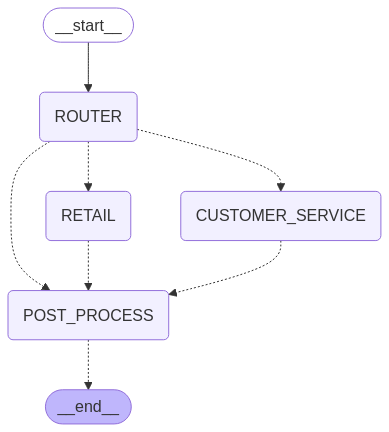

In [10]:
display(ipd.Image(state_graph.compile().get_graph().draw_mermaid_png()))

### Wrapper function to stream generation output to notebook

In [11]:
async def ask(user_input: str, session: str | None = None):
    thread_id = session or uuid.uuid4().hex

    agent_config = AgentConfig(
        project=PROJECT_ID,
        region=REGION,
        chat_model_name=CHAT_MODEL_NAME,
        router_model_name=ROUTER_MODEL_NAME,
        max_router_turn_history=MAX_TURN_HISTORY,
    )

    current_source = last_source = None
    all_text = ""
    async for stream_mode, chunk in compiled_graph.astream(
        input={"current_turn": {"user_input": user_input}},
        config={"configurable": {"thread_id": thread_id, "agent_config": agent_config}},
        stream_mode=["custom"],
    ):
        assert isinstance(chunk, dict), "Expected dictionary chunk"

        text = ""

        if "router_classification" in chunk:
            target = chunk["router_classification"]["target"]
            reason = chunk["router_classification"]["reason"]

            text = f"Agent Classification: {target}\n\nReason: {reason}"
            current_source = "router_classification"

        elif "text" in chunk:
            text = chunk["text"]
            current_source = "text"

        elif "error" in chunk:
            text = chunk["error"]
            current_source = "error"

        else:
            print("unhandled chunk case:", chunk)

        if last_source is not None and last_source != current_source:
            text = "\n\n---\n\n" + text

        last_source = current_source

        all_text += text
        display(ipd.Markdown(all_text), clear=True)

## Test Conversation

In [12]:
session = uuid.uuid4().hex

In [13]:
await ask("What products do you offer?", session=session)

Agent Classification: Conversational Retail Search Assistant

Reason: The query is a broad request for product information, which falls under the scope of the Conversational Retail Search Assistant.  This assistant can provide details on the various products offered by Cymbal.

---

Cymbal offers a wide variety of musical instruments, equipment, and accessories.  We specialize in string instruments like guitars, basses, violins, and cellos, but we also carry a great selection of keyboards, drums, woodwinds, brass instruments, and even some more niche items like ukuleles and mandolins.  Beyond instruments themselves, we offer a full range of accessories including strings, picks, straps, tuners, cables, amplifiers, microphones, headphones, sheet music, and instrument care products.  We also carry a curated selection of recording equipment for home studios and professional setups.  Basically, if you need it to make music, we probably have it!


In [14]:
await ask("can you summarize the plot of twlight?", session=session)

Agent Classification: Unsupported

Reason: The query is unrelated to Cymbal products or services and is therefore out of scope for both the retail and customer support assistants.

---

I'm sorry, I am unable to process your request as it is outside of my current capabilities. Please try asking me about our retail business or customer support.

In [15]:
await ask("WTF you can't do anything, let me speak to a HUMAN!!!", session=session)

Agent Classification: Customer Support Assistant

Reason: The user is expressing frustration and demanding to speak with a human representative, indicating a need for customer support.

---

I understand your frustration. I'm doing my best to assist you, but I realize I may not be able to address your specific needs as effectively as a human representative.  

Could you please tell me what issue you're experiencing? I'll do my best to help, and if I can't, I'll connect you with a human customer service agent.  We're available by phone at 1-800-CYMBAL (1-800-296-225) Monday through Friday, 9am to 6pm EST. You can also reach us via email at support@cymbal.com.  We also offer live chat support on our website during business hours.  Which method would you prefer?


In [16]:
await ask(
    "i jsut want to return this twlight dvd and you're being stupid", session=session
)

Agent Classification: Customer Support Assistant

Reason: The user is requesting a return, which is a customer service issue.

---

I understand you'd like to return a Twilight DVD.  While Cymbal specializes in musical instruments and accessories, we don't currently sell movies. It's possible you purchased it from a different retailer.  Could you double-check the store where you bought it?  Knowing the correct retailer will help you get the return process started quickly.
